# Exploratory Data Analysis

## Setup

In [1]:
# Necessary imports and more
# ==========================

import sys
sys.path.append('..')
import src
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
from pathlib import Path

## Data load

In [2]:
# Raw data load
# =============

file_loc = '../data/raw/hipparcos-voidmain.csv'
raw_data = pd.read_csv(file_loc)

In [3]:
# Raw data preview
# ================

raw_data.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


## EDA

In [4]:
# Dataframe shape
# ===============
raw_data.shape

(118218, 78)

In [5]:
# Dataframe info
# ==============

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118218 entries, 0 to 118217
Data columns (total 78 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Catalog    118218 non-null  object 
 1   HIP        118218 non-null  int64  
 2   Proxy      10925 non-null   object 
 3   RAhms      118218 non-null  object 
 4   DEdms      118218 non-null  object 
 5   Vmag       118217 non-null  float64
 6   VarFlag    11562 non-null   float64
 7   r_Vmag     118217 non-null  object 
 8   RAdeg      117955 non-null  float64
 9   DEdeg      117955 non-null  float64
 10  AstroRef   13734 non-null   object 
 11  Plx        117955 non-null  float64
 12  pmRA       117955 non-null  float64
 13  pmDE       117955 non-null  float64
 14  e_RAdeg    117955 non-null  float64
 15  e_DEdeg    117955 non-null  float64
 16  e_Plx      117955 non-null  float64
 17  e_pmRA     117955 non-null  float64
 18  e_pmDE     117955 non-null  float64
 19  DE:RA      117955 non-n

In [6]:
# Description of categorical features
# ===================================

raw_data.describe(include = ['object'])

,Catalog,Proxy,RAhms,DEdms,r_Vmag,AstroRef,m_BTmag,r_B-V,r_V-I,CombMag,...,Qual,m_HIP,Survey,Chart,Notes,BD,CoD,CPD,SpType,r_SpType
count,118218,10925,118218,118218,118217,13734,12796,116937,118218,10783,...,20835,11101,52045,11653,4178,73160,27880,40250,115184,115184
unique,1,2,117384,116926,3,9,8,2,20,1,...,5,21,1,2,7,73159,27880,40250,4124,8
top,H,H,07 03 14.21,-19 28 09.3,H,A,*,T,L,*,...,A,AB,S,G,P,B+56 1790,C-41 15372,P-52 12237,K0,S
freq,118218,10800,3,3,94669,9526,7795,75732,74269,10783,...,9521,10200,52045,10877,2129,2,1,1,8570,56983


In [7]:
# Description of numerical features
# =================================

raw_data.describe()

,HIP,Vmag,VarFlag,RAdeg,DEdeg,Plx,pmRA,pmDE,e_RAdeg,e_DEdeg,...,moreVar,Nsys,Ncomp,theta,rho,e_rho,dHp,e_dHp,HD,(V-I)red
count,118218.000000,118217.000000,11562.000000,117955.000000,117955.000000,117955.000000,117955.000000,117955.000000,117955.000000,117955.00000,...,8254.000000,19393.000000,117955.000000,11101.000000,11101.000000,11101.000000,11101.000000,11101.000000,98880.000000,118218.000000
mean,59176.745707,8.373233,1.739405,181.466380,-2.143250,7.215220,-1.303405,-16.599682,1.320787,1.10227,...,1.671432,1.193162,1.096452,181.245113,2.404513,0.019035,1.720967,0.160373,114374.227569,0.758321
std,34169.725917,1.312044,0.618728,103.261685,41.016397,11.286095,98.199404,93.859400,4.123088,3.43051,...,0.469721,0.418750,0.299403,104.910916,3.316871,0.021216,1.170635,0.252330,74189.731163,0.581249
min,1.000000,-1.440000,1.000000,0.000912,-89.782454,-54.950000,-4410.790000,-5813.000000,0.270000,0.33000,...,1.000000,1.000000,1.000000,0.000000,0.082000,0.001000,0.000000,0.010000,1.000000,-0.520000
25%,29581.250000,7.640000,1.000000,93.425334,-36.636503,2.510000,-15.150000,-21.740000,0.670000,0.59000,...,1.000000,1.000000,1.000000,92.000000,0.352000,0.005000,0.650000,0.030000,46735.750000,0.410000
50%,59177.500000,8.440000,2.000000,181.969874,-1.945926,4.610000,-1.680000,-5.650000,0.870000,0.72000,...,2.000000,1.000000,1.000000,183.000000,0.978000,0.011000,1.630000,0.070000,110373.500000,0.690000
75%,88767.750000,9.150000,2.000000,271.744455,31.435615,8.410000,11.840000,3.760000,1.170000,0.92000,...,2.000000,1.000000,1.000000,272.000000,3.050000,0.025000,2.700000,0.180000,175840.250000,1.040000
max,120416.000000,14.080000,3.000000,359.978792,89.569409,772.330000,6767.260000,10326.930000,281.160000,241.06000,...,2.000000,4.000000,4.000000,359.000000,23.588000,0.242000,4.470000,5.620000,358431.000000,9.290000


In [8]:
# Check % of missing values in dataframe
# ======================================

missing_values = src.check_missing(raw_data)
missing_values

,Total missing,Percent missing
Period,115677,97.850581
Source,114982,97.262684
morePhoto,114637,96.970850
Notes,114040,96.465851
moreVar,109964,93.017984
CombMag,107435,90.878716
Proxy,107293,90.758599
m_HIP,107117,90.609721
e_rho,107117,90.609721
theta,107117,90.609721


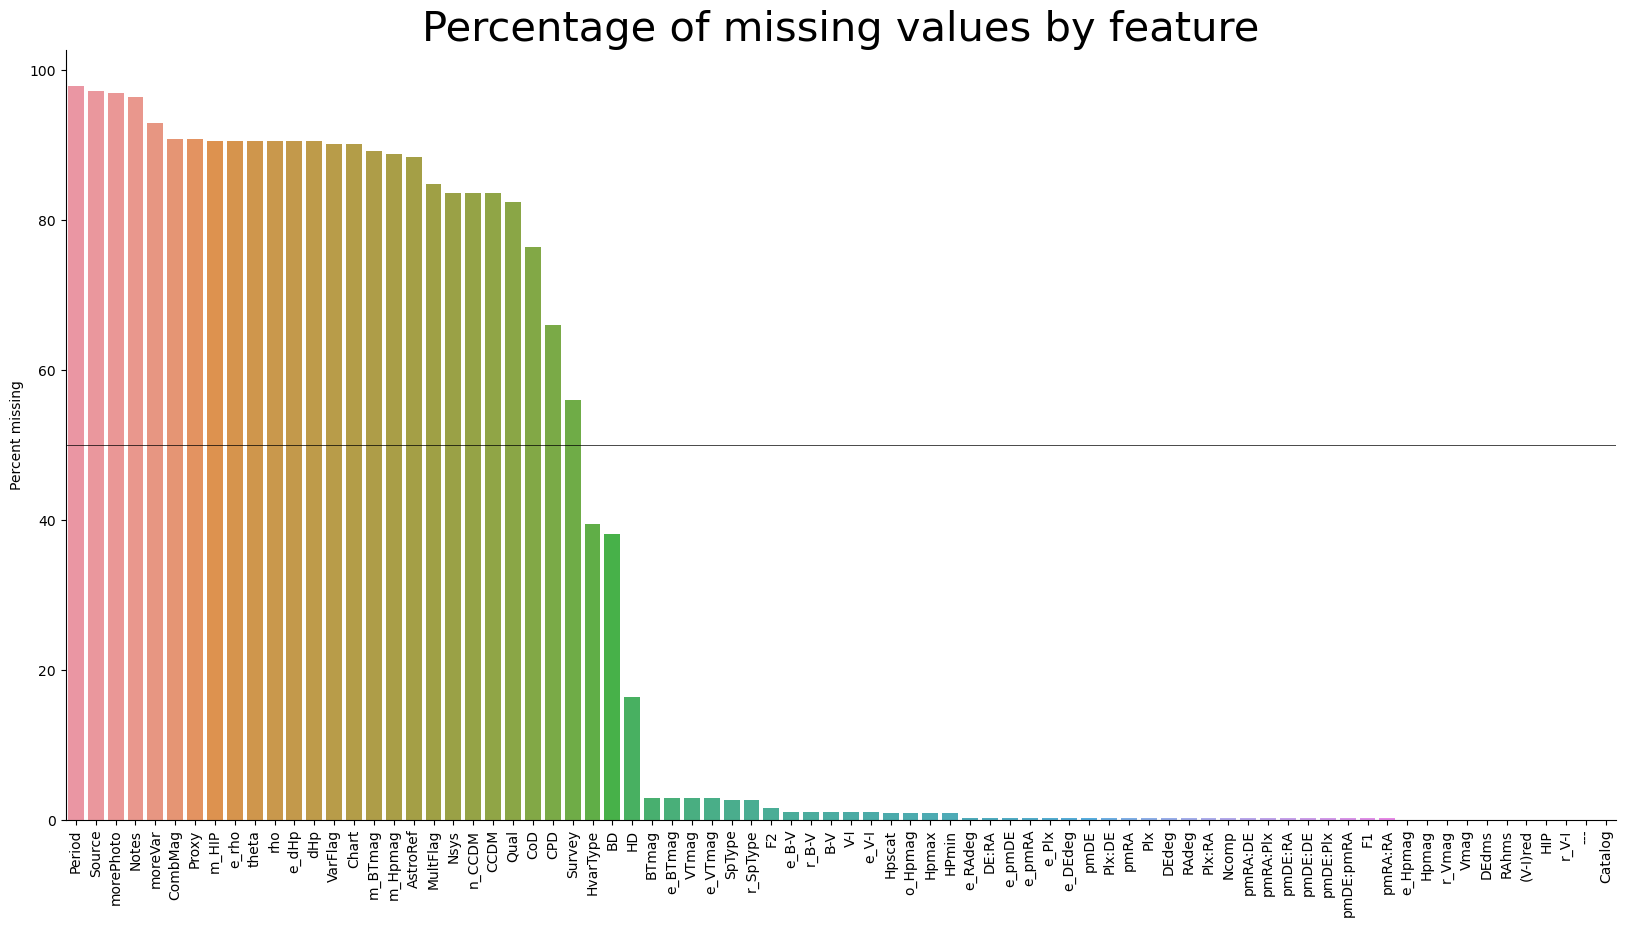

In [9]:
# Graph missing values data
# =========================

fig, ax = plt.subplots(figsize = (20, 10))
sns.despine(fig)
graph = sns.barplot(data = missing_values, x = missing_values.index, y = 'Percent missing')
plt.axhline(y = 50, linewidth = 0.5, color = 'k', linestyle = '-')
plt.title('Percentage of missing values by feature', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [15]:
# Saving missing values dataframe to new CSV file
# ===============================================

filepath = Path('../data/interim/missing_values.csv')
missing_values.to_csv(filepath)